# Analyse de la température moyenne en Europe

Au cours de cet exercice, vous serez amené·es à manipuler certains des concepts essentiels du langage Python en vue d’effectuer des calculs statistiques pour analyser des relevés de température en Europe, de 1950 à 2020. Notons tout de suite que ces données sont **factices**.

## Préparation du programme

Commencez par réfléchir à la structuration de votre programme, puis mettez en place les premières structures dans votre script. L’objectif est, au terme, d’obtenir un fichier Python exécutable.

Importez les bibliothèques logicielles nécessaires et préparez une fonction `read_data()` pour acquérir les données qui se trouvent dans un fichier [*european_temperatures.tsv*](../data/european_temperatures.tsv) stocké dans le répertoire *data*. Prenez le temps d’appréhender la structure du fichier :

```csv
country  year  jan  feb  …
France  1950  4.0  …
France  1951  1.8  …
…
France  2020  -0.2  …
Allemagne  1950  4.4  …
…
```

On recense, pour chaque année entre 1950 et 2020 comprises, les températures moyennes dans les pays européens pour les mois de janvier à décembre. Essayez de produire une structure de données sous forme de dictionnaire :

```python
data = {
    'France': {
        '1950': [4.0,…],
        '1951': [1.8,…]
    },
    'Allemagne': {
        '1950': [4.4]
    }
}
```

In [4]:
# your code here

import csv

def read_data(f):
    """Reads data from a TSV file and returns a dictionary of
    average temperatures by country."""
    data = {}
    
    # open file
    with open(f, mode='r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        
        # each row
        for row in reader:
            country = row['country']
            year = row['year']
            
            # Extraire les températures pour chaque mois (de janvier à décembre)
            temperatures = [
                float(row['january']), float(row['february']), float(row['march']),
                float(row['april']), float(row['may']), float(row['june']),
                float(row['july']), float(row['august']), float(row['september']),
                float(row['october']), float(row['november']), float(row['december'])
            ]
            
            # add country if not yet in the file
            if country not in data:
                data[country] = {}
            
            # add temperatures to the related year
            data[country][year] = temperatures
    
    return data

# call function
data = read_data("../data/european_temperatures.tsv")

## Analyse descriptive des données

Préparez à présent une fonction `average_temperature()` qui prenne en entrée votre structure de données et renvoie la température moyenne par pays et par année :

In [7]:
# your code here

def average_temperature(data):
    """Calculate the average temperature by country and year.

    Argument:
    data -- dictionary containing temperatures by country and year
    """
    averages = {}

    for country, years in data.items():
        averages[country] = {}
        for year, temperatures in years.items():
            # average temperatures: sum div nb
            avg_temp = sum(temperatures) / len(temperatures)
            averages[country][year] = round(avg_temp, 2)
    
    return averages

Récoltons les températures moyennes dans une variable `averages` :

In [21]:
# call function
averages = average_temperature(data)

Il est temps maintenant d’avoir un aperçu des données récoltées. Concevez une fonction `plot_temperature_evolution()` qui affiche un graphique pour représenter l’évolution des températures pour un pays donné :

In [18]:
# your code here

import matplotlib.pyplot as plt

def plot_temperature_evolution(data, country):
    """Displays a graph showing the change in
    average temperature per year for a given country.

    Arguments:
    data -- dctionary containing average temperatures by country and year.
    country -- the name of the country.
    """

    # extract years and average temperatures to plot in the axis
    years = sorted([ int(year) for year in data[country].keys() ])
    avg_temperatures = [ data[country][str(year)] for year in years ]

    # conceive the graph
    plt.figure(figsize=(10, 5))
    plt.plot(years, avg_temperatures, marker='o', linestyle='-', color='b', label=f'Average temperature for {country}')

    # some labels
    plt.xlabel('Year')
    plt.ylabel('Average temperature (°C)')
    plt.title(f"Evolution of the temperature between 1950 and 2020 - {country}")
    plt.grid(True)
    plt.legend()

    # display the graph
    plt.show()

Vérifions que votre fonction renvoie bien un graphique :

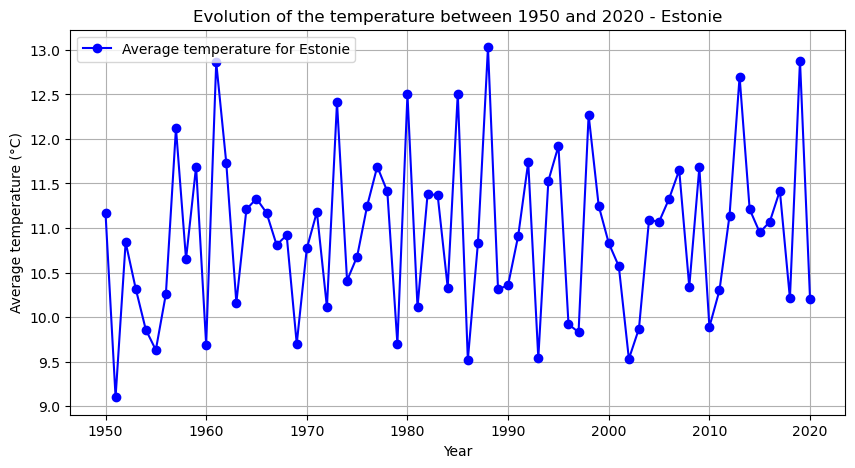

In [22]:
# call function
plot_temperature_evolution(averages, 'Estonie')